# Описание задания

Это небольшое тестовое задание для того, чтобы оценить технические навыки и бизнес-мышление кандидата. Задание состоит из трех блоков: SQL, Python и вопрос с открытым ответом. Задание нужно выполнить прямо в этом ноутбуке и отправить его обратно Мигунову Алексею.

# SQL

Вам нужно, изучить структуру базы данных клиента (смотри картинку ниже) и написать несколько запросов. Запросы писать прямо здесь. Можно решить 3 из 5 задач. Если решите все - это плюс, но если 3, то ничего страшного.

Это описание базы данных клиента:
(если фото не открывается или плохо видно, то просто открой картинку в папке с заданием).

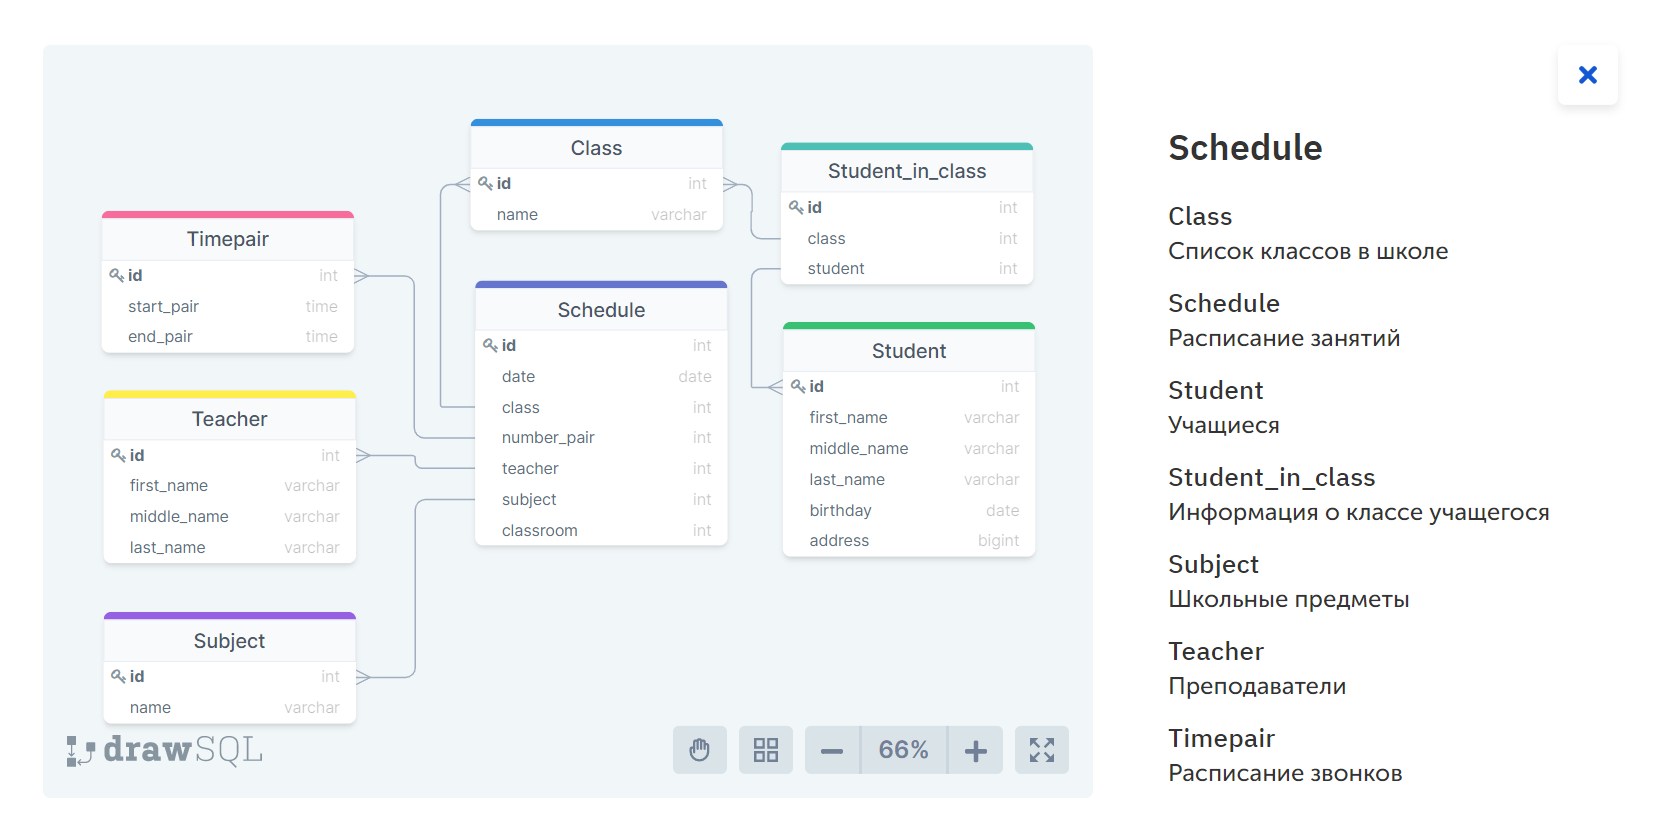

In [1]:
from IPython.display import Image
Image("DWH_schema.png")

Вопрос 1: Какой процент обучающихся учится в 10 А классе ?

In [2]:
# Пишите код сюда:

# Мне не важно какой СУБД вы пользуетесь.

# Удачи, у вас все получится )))

# SELECT SUM(CASE
# WHEN c.name = '10A' then 1
# ELSE 0 
# END)*100/COUNT(*)
# FROM Students_in_class sic 
# JOIN Class c on sic.class = c.id


Вопрос 2: Сколько обучающихся в 10 Б классе ?

In [3]:
# Пишите код сюда:

# SELECT count(student) from Student_in_class sic
# JOIN class c on sic.class = c.id
# WHERE c.name = '10Б'

Вопрос 3: У каких классов 3го сентября 2018го года первым уроком была математика 'math' ?

In [4]:
# Пишите код сюда:

# SELECT c.name FROM Schedule s
# LEFT JOIN Class c ON s.class=c.id
# JOIN Subject s2 on s.subject=s2.id
# WHERE s.number_pair = 1 and s.date = '03/09/2018' and s2.name = 'math'

Вопрос 4: Какой учитель ведет занятия у наибольшего числа обучающихся ?

In [5]:
# Пишите код сюда:

# SELECT t2.name FROM (
#   SELECT t.name as name, count(sic.student) as sicmax from Teacher t
#   LEFT JOIN Schedule s on t.id = s.teacher
#   LEFT JOIN Class c on s.class = c.id
#   LEFT JOIN Student_in_class sic on c.id = sic.class 
#   GROUP BY t.id) t2
# HAVING t2.sicmax = MAX(t2.sicmax)



Вопрос 5*: Предполодим, что не все уроки длятся одинаковое количество времени. Сколько времени идет самый длинный урок (в секундах, в минутах, в часах) округлять до двух знаков после запятой.

In [6]:
# Пишите код сюда:
# SELECT TRUNCATE(max_diff / 3600, 2) as max_in_hours,
#        TRUNCATE(max_diff / 60, 2) as max_in_mins,
#        max_diff as max_in_secs 
#FROM (
#  SELECT MAX(UNIX_TIMESTAMP(end_pair) - UNIX_TIMESTAMP(start_pair)) as max_diff
#  FROM Timepair
# );

# Python

Руководитель департамента роста попросил тебя проанализировать данные о привлечении клиентов на инвестиционную платформу. Он попросил дать верхнеуровневую оценку ситуации и предоставить результаты в виде графиков.

Инженер баз данных прислал тебе выгрузку (data.xlsx файл находится в папке)

In [7]:
# Пишите код сюда:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel('data.xlsx')

#Смотрю на числовые данные в целом, 2 колнки, не считая пользователей,
#со значениями примерно одного порядка.
#Не похоже, что есть какие-то выбросы.
df.describe()

#Оцениваю, есть ли пропуски.
df.isnull().sum()
#Пропусков нет, инженер баз данных работает хорошо!

#Смотрю на колонки, что вообще есть в базе.
df.columns

#4 колонки, первая же мысль, создать еще колонку с разницей между LTV и cost.
df['gains'] = df['LTV_forecast']-df['cost_of_utilization']

#Колонка с вытяжкой месяца из даты подключения клиента.
df['month'] = df['utilization_date'].dt.strftime('%b')
df['month'].unique()

#Данные есть только до авугста.
categories=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug']

#сумма LTV по месяцам, отсортированная по месяцам.
LTV = df.groupby('month')['LTV_forecast'].sum()
LTV = LTV.reindex(categories)

#Сумма затрат, отсортированная по месяцам
CoU = df.groupby('month')['cost_of_utilization'].sum()
CoU = CoU.reindex(categories)

#Общая прибыль по месяцам
profit = df.groupby('month')['gains'].sum()
profit = profit.reindex(categories)
sum_p = []
sumi=0
for i in profit:
    sumi = sumi+i
    sum_p.append(sumi)
    
#Разница в прибыли по месяцам
dif=[]
dif.append(sum_p[0])
for i in range(1,len(sum_p)):
    dif.append(sum_p[i]-sum_p[i-1])
    
#Приток клиентов по месяцам
users = df.groupby('month')['user_id'].count()
users = users.reindex(categories)

#Прибыль от каждого клиента по месяцам
effect = df.groupby('month')['gains'].sum()
effect = effect.reindex(categories)
effect = effect/users

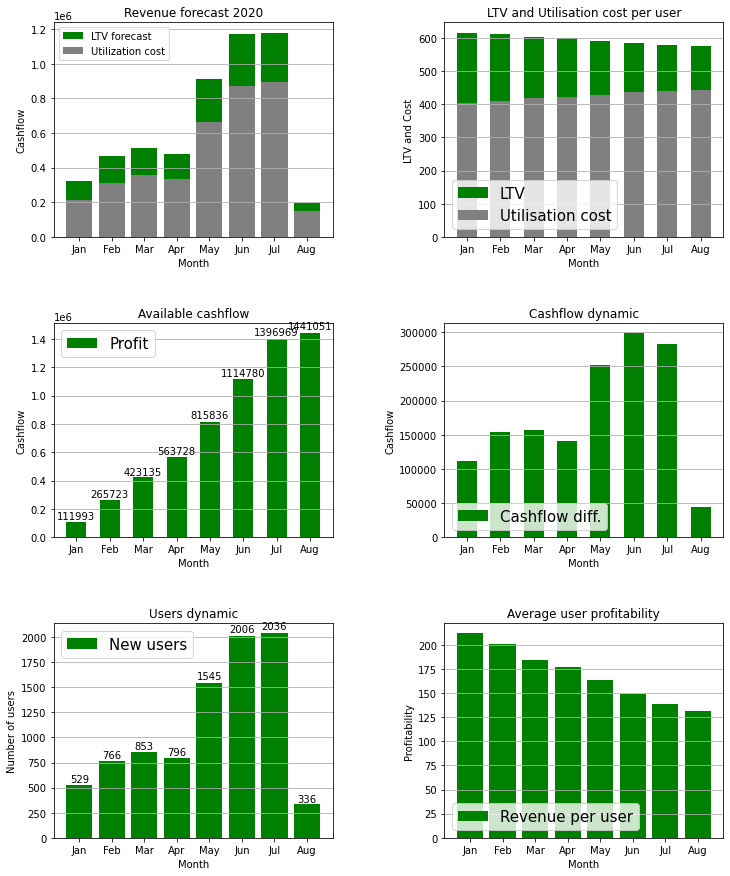

In [8]:
# Построим графики всех найденных показателей:
fig,ax = plt.subplots(3,2, figsize=(12,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
gplot = ax[0,0].bar(x = LTV.keys(), height = LTV,label = 'LTV forecast', color='green')
gplot2 = ax[0,0].bar(x = CoU.keys(), height = CoU,label = 'Utilization cost', color = 'gray')
ax[0,0].set_title('Revenue forecast 2020')
ax[0,0].set_ylabel('Cashflow')
ax[0,0].set_xlabel('Month')
ax[0,0].grid(axis='y')
ax[0,0].legend(loc = 'upper left',fontsize = 10)
      

LTVplot = ax[0,1].bar(x = categories, height = LTV/users,label = 'LTV',width = 0.6, color = 'green')
ucplot = ax[0,1].bar(x = categories, height = CoU/users,label = 'Utilisation cost',width = 0.6, color = 'grey')
ax[0,1].set_title('LTV and Utilisation cost per user')
ax[0,1].set_ylabel('LTV and Cost')
ax[0,1].set_xlabel('Month')
ax[0,1].grid(axis='y')
ax[0,1].legend(loc = 'lower left',fontsize = 15)


cplot = ax[1,0].bar(x = categories, height = sum_p,label = 'Profit',width = 0.6, color = 'green')
ax[1,0].set_title('Available cashflow')
ax[1,0].set_ylabel('Cashflow')
ax[1,0].set_xlabel('Month')
ax[1,0].grid(axis='y')
ax[1,0].legend(loc = 'upper left',fontsize = 15)
for rect in cplot:
        height = rect.get_height()
        ax[1,0].text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
dplot = ax[1,1].bar(x = categories, height = dif,label = 'Cashflow diff.',width = 0.6, color = 'green')
ax[1,1].set_title('Cashflow dynamic')
ax[1,1].set_ylabel('Cashflow')
ax[1,1].set_xlabel('Month')
ax[1,1].grid(axis='y')
ax[1,1].legend(loc = 'lower left',fontsize = 15)


uplot = ax[2,0].bar(x = users.keys(), height = users.values,label = 'New users', color = 'green')
ax[2,0].set_title('Users dynamic')
ax[2,0].set_ylabel('Number of users')
ax[2,0].set_xlabel('Month')
ax[2,0].grid(axis='y')
ax[2,0].legend(loc = 'upper left',fontsize = 15)
for rect in uplot:
        height = rect.get_height()
        ax[2,0].text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')


eplot = ax[2,1].bar(x = effect.keys(), height = effect.values,label = 'Revenue per user', color = 'green')
ax[2,1].set_title('Average user profitability')
ax[2,1].set_ylabel('Profitability')
ax[2,1].set_xlabel('Month')
ax[2,1].grid(axis='y')
ax[2,1].legend(loc = 'lower left',fontsize = 15)


# Расшифровка графиков:

**Revenue forecast 2020:** Сравнение параметров LTV forecast и Utilisation cost. Показывает эволюцию параметров и разницы между ними.<br>
**LTV and Utilisation cost per user:** Распределение LTV forecast и Utilisation cost на каждого пользователя. Позволяет объяснить негативную динамику Average user profitability.<br>
**Average cashflow:** Общая сумма свободных средств, как кумулятивная сумма разницы между LTV forecast и utilisation cost.<br>
**Cashflow dynamic:** Динамика изменения свободных средств по месяцам. Помогает отследить успешность платформы в целом.<br>
**Users dynamic:** Динамика количества новых пользователей по месяцам.<br>
**Average user profitability:** Средняя прибыль от одного пользователя, подключенного в данном месяце. Падение может быть связано с увеличением utilisation cost при росте пользователей.<br>

In [9]:
# Пишите код сюда:

In [10]:
# Пишите код сюда:

Кратко опишите результаты анализа:

## Результаты анализа
Инвестиционная платформа работает и приносит прибыль. Однако темпы роста прибыльности каждого клиента в течении года уменьшаются, что может быть связано с увеличением стоимости обслуживания клиентов. Возможно техническое решение платформы имеет проблемы при масштабировании. В августе наблюдаеся снижение всех параметров, но это связано с тем, что даные собраны только за первые 2 дня. Стоит обратить внимание на то, что было сделано в летний период, так как это привело к такому росту числа клиентов.

# Вопрос с открытым ответом

Представьте, что вы являетесь аналитиком во втором по величине сервисе по заказу такси в стране А. Сервис называется "СЕТИМОБИЛ". Вы замерели NPS и поняли, что он существенно ниже, чем у компании кнкурента "ИНДЕКС ТАКСИ". Сгенерируйте 20 гипотез, в чем может быть причина такого большого различия.

Причин разницы NPS может быть достаточно много:<br>
<br>Высокая цена услуг<br>
Низкая скорость обработки жалоб<br>
Неудовлетворительное качество обработки жалоб<br>
Плохое состояние автомобилей<br>
Недостаточный профессионализм водителя<br>
Клиенту дольше приходится ждать машины<br>
Низкая точность подачи такси<br>
Отсутствие бонусных программ<br>
Бесполезность бонусных программ<br>
Технические проблемы с промокодами<br>
Эргономика мобильного приложения<br>
Невозможность поездок с питомцами/детьми<br>
Отсутствие дополнительных интегрированных сервисов<br>
Высокая частота сбоев мобильного приложения<br>
Некорретная работа алгоритма определения повышенного спроса<br>
Отсутствие своевременного обновления карт<br>
Низкий охват рынка<br>
Нет активных программ по переманиванию клиентов от других агрегаторов<br>
Разнообразие автомобилей в классах автомобилей<br>
Малое сооотношение между количеством автомобилей в классе<br>
Нестрогая идентификация водителей. Возможность по одному подтвержденному заказу приехать другому водителю.<br>
Неполнота/несвоевременность информации по дополнительным комиссиям (за ожидание/отмену/доп.услуги)<br>
Нет возможности смешанной оплаты или постоплаты<br>